<a href="https://colab.research.google.com/github/AhmetA75/CEV-BEBKA-VBE-WEEK-12-Dimensionally-Reduction-/blob/main/CEV_BEBKA_VBE_Week_11_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 12(A-B-C)

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from time import time
import warnings as warn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

In [ ]:
warn.simplefilter('ignore')

In [ ]:
X = data.iloc[:,15:]

In [ ]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(X)

In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z_tsne = tsne.fit_transform(X) 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1600 samples in 0.000s...
[t-SNE] Computed neighbors for 1600 samples in 0.135s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1600
[t-SNE] Computed conditional probabilities for sample 1600 / 1600
[t-SNE] Mean sigma: 0.038008
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.485611
[t-SNE] KL divergence after 1000 iterations: 0.927744


In [ ]:
y = data["CDRGLOB"]
y

0       0
1       0
2       0
3       0
4       0
       ..
1595    0
1596    0
1597    2
1598    0
1599    1
Name: CDRGLOB, Length: 1600, dtype: int64

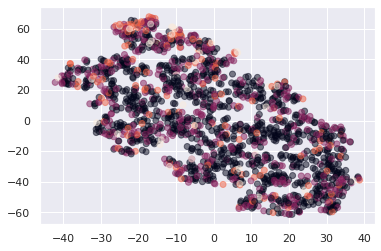

In [85]:
plt.scatter(z_tsne[:, 0], z_tsne[:, 1], alpha=0.5, c=y);

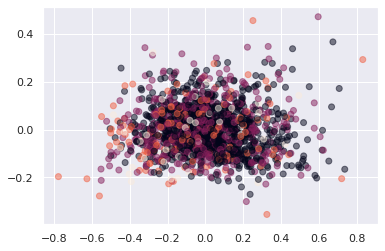

In [ ]:
plt.scatter(projected[:, 0], projected[:, 1], alpha=0.5, c=y);

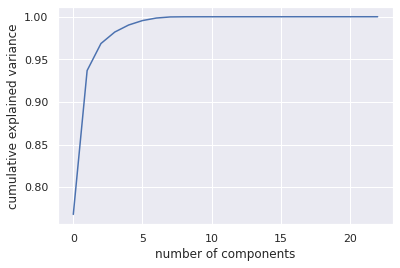

In [ ]:
pca_all = PCA().fit(X)
plt.plot(np.cumsum(pca_all.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
pca_95 = PCA(0.99).fit(X)
pca_95.n_components_

5

In [ ]:
X_pca_95 = pca_95.transform(X)

In [ ]:
X_pca_95

array([[-0.14704211, -0.00355413,  0.06324623, -0.04025673, -0.00975799],
       [ 0.10845828, -0.10900543, -0.02131388, -0.04077134, -0.00952635],
       [-0.02260633,  0.07997117,  0.07866162, -0.01290062, -0.00515264],
       ...,
       [ 0.21178709, -0.01164516, -0.0411088 ,  0.04041863,  0.02650765],
       [ 0.08974328, -0.10051583, -0.04002662,  0.04950462,  0.04418585],
       [ 0.2687375 , -0.00309844, -0.07679025,  0.05115195,  0.04697744]])

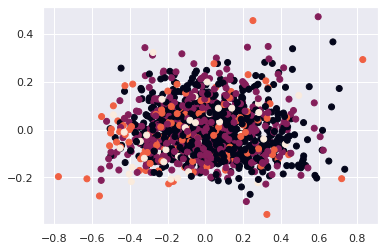

In [ ]:
from sklearn.decomposition import PCA # The reason of using and importing this libariy for converting 3D graph to 2D

X_pca = PCA(n_components=2).fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y);

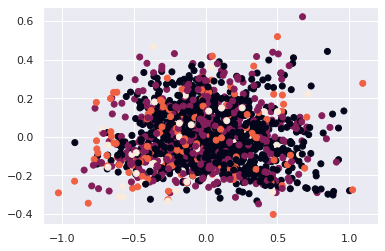

In [ ]:

from sklearn.manifold import Isomap
X_isomap = Isomap(n_components=2).fit_transform(X)

plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y);

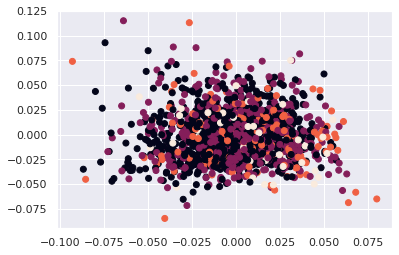

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=10, n_components=7, method='modified',
                               eigen_solver='dense')
LLE_out = model.fit_transform(X)
plt.scatter(LLE_out[:, 0], LLE_out[:, 1], c=y);

In [ ]:
random_forest = RandomForestClassifier()
svc = svm.LinearSVC()
gauss = GaussianNB()

In [ ]:
X=X_isomap
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)
gauss.fit(X=x_train,y=y_train)
random_forest.fit(X=x_train, y=y_train)
svc.fit(X=x_train, y=y_train)

LinearSVC()

In [ ]:
X=LLE_out
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)
gauss.fit(X=x_train,y=y_train)
random_forest.fit(X=x_train, y=y_train)
svc.fit(X=x_train, y=y_train)

LinearSVC()

In [ ]:
print(f'TEST ACC GNB ==> {gauss.score(x_test, y_test)}') 
print(f'TEST ACC RF ==> {random_forest.score(x_test, y_test)}')
print(f'TEST ACC SVC ==> {svc.score(x_test, y_test)}')

TEST ACC GNB ==> 0.6275
TEST ACC RF ==> 0.585
TEST ACC SVC ==> 0.63


In [ ]:
random_forest_param = {
                    'n_estimators' : [10,20,50,100],
                    'criterion' : ['chi','gini'],
                    'min_samples_split': [2,4,6],
                    'min_weight_fraction_leaf' : [0.001,0.1,0.2],
                    'verbose' :[0],
                    'random_state': [22],
                    'ccp_alpha': [0.1 ,0.2, 0.5],
                    'max_depth': [1,5,10,20]}

In [ ]:
svc_param = {
                    'penalty' : ['l1','l2'],
                    'dual' : [True,False],
                    'fit_intercept': [True,False],
                    'class_weight' : ['balanced',None],
                    'verbose' :[0],
                    'random_state': [22,None],
                    'max_iter': [10,100,1000]}

In [ ]:
GNB_param = {
                    'var_smoothing':[0.000001]}

In [ ]:

X=X_pca
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)
gauss.fit(X=x_train,y=y_train)
random_forest.fit(X=x_train, y=y_train)
svc.fit(X=x_train, y=y_train)
print(f'TEST ACC RF ==> {random_forest.score(x_test, y_test)}')
random_forest_param = {
                    'n_estimators' : [10,20,50,100],
                    'criterion' : ['chi','gini'],
                    'min_samples_split': [2,4,6],
                    'min_weight_fraction_leaf' : [0.001,0.1,0.2],
                    'verbose' :[0],
                    'random_state': [22],
                    'ccp_alpha': [0.1 ,0.2, 0.5],
                    'max_depth': [1,5,10,20]}
grid_random_forest_5 = GridSearchCV(RandomForestClassifier(), random_forest_param, cv=5) 
start = time() # For working time and tested by cv=5
grid_random_forest_5.fit(x_train, y_train)
print(f'TIME FOR CV=5 ==> {time() - start}')
print(f'BEST PARAMS FOR GRID RANDOM FOREST  CV = 5 ==> {grid_random_forest_5.best_params_}')
print(f'TEST ACC GRID RANGOM FOREST CV = 5 ==> {grid_random_forest_5.score(x_test, y_test)}')
svc_param = {
                    
                    'dual' : [True,False],
                    'fit_intercept': [True,False],
                    'class_weight' : ['balanced',None],
                    'verbose' :[0],
                    'random_state': [22,None] }
grid_svc_5 = GridSearchCV(svm.LinearSVC(), svc_param, cv=5) 
start = time() # For working time and tested by cv=5
grid_svc_5.fit(x_train, y_train)
print(f'TIME FOR CV=5 ==> {time() - start}')
print(f'BEST PARAMS FOR GRID SVC  CV = 5 ==> {grid_svc_5.best_params_}')
print(f'TEST ACC GRID SVC CV = 5 ==> {grid_svc_5.score(x_test, y_test)}')
GNB_param = {
                    'var_smoothing':[0.000001]}

grid_GNB_5 = GridSearchCV(GaussianNB(), GNB_param, cv=5) 
start = time() # For working time and tested by cv=5
grid_GNB_5.fit(x_train, y_train)
print(f'TIME FOR CV=5 ==> {time() - start}')
print(f'BEST PARAMS FOR GRID GNB  CV = 5 ==> {grid_GNB_5.best_params_}')
print(f'TEST ACC GRID GNB CV = 5 ==> {grid_GNB_5.score(x_test, y_test)}')
sample = grid_svc_5
sample.fit(x_train,y_train)
sample_1 = grid_GNB_5
sample_1.fit(x_train,y_train)
sample_2 = grid_random_forest_5
sample_2.fit(x_train,y_train)
y_sample = sample.predict(x_test)                                                          
accuracy=(accuracy_score(y_test, y_sample))                        

a=pd.DataFrame([accuracy]);
b=a.max()

print('The Max Value:',b);
y_sample1 = sample_1.predict(x_test)
accuracy=(accuracy_score(y_test, y_sample1))
a_1=pd.DataFrame([accuracy]);
b_1=a_1.max()

print('The Max Value:',b_1);
y_sample2 = sample_2.predict(x_test)
accuracy = (accuracy_score(y_test, y_sample2))
a_2=pd.DataFrame([accuracy]);
b_2=a_2.max()

print('The Max Value:',b_2);
class_names = ['class 0', 'class 1', 'class 2' , 'class 3']
print(classification_report(y_sample, y_test, target_names=class_names))
print(classification_report(y_sample1, y_test, target_names=class_names))
print(classification_report(y_sample2, y_test, target_names=class_names))
print(confusion_matrix(y_sample, y_test))
print(confusion_matrix(y_sample1, y_test))
print(confusion_matrix(y_sample2, y_test))

TEST ACC RF ==> 0.5625
TIME FOR CV=5 ==> 205.44528317451477
BEST PARAMS FOR GRID RANDOM FOREST  CV = 5 ==> {'ccp_alpha': 0.1, 'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.001, 'n_estimators': 10, 'random_state': 22, 'verbose': 0}
TEST ACC GRID RANGOM FOREST CV = 5 ==> 0.63
TIME FOR CV=5 ==> 0.4040253162384033
BEST PARAMS FOR GRID SVC  CV = 5 ==> {'class_weight': 'balanced', 'dual': True, 'fit_intercept': True, 'random_state': 22, 'verbose': 0}
TEST ACC GRID SVC CV = 5 ==> 0.63
TIME FOR CV=5 ==> 0.010978460311889648
BEST PARAMS FOR GRID GNB  CV = 5 ==> {'var_smoothing': 1e-06}
TEST ACC GRID GNB CV = 5 ==> 0.62
The Max Value: 0    0.63
dtype: float64
The Max Value: 0    0.62
dtype: float64
The Max Value: 0    0.63
dtype: float64
              precision    recall  f1-score   support

     class 0       0.98      0.64      0.78       383
     class 1       0.02      0.50      0.04         4
     class 2       0.09      0.23      0.13        13


In [ ]:
X=X_isomap
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)
gauss.fit(X=x_train,y=y_train)
random_forest.fit(X=x_train, y=y_train)
svc.fit(X=x_train, y=y_train)
print(f'TEST ACC RF ==> {random_forest.score(x_test, y_test)}')
random_forest_param = {
                    'n_estimators' : [10,20,50,100],
                    'criterion' : ['chi','gini'],
                    'min_samples_split': [2,4,6],
                    'min_weight_fraction_leaf' : [0.001,0.1,0.2],
                    'verbose' :[0],
                    'random_state': [22],
                    'ccp_alpha': [0.1 ,0.2, 0.5],
                    'max_depth': [1,5,10,20]}
grid_random_forest_5 = GridSearchCV(RandomForestClassifier(), random_forest_param, cv=5) 
start = time() # For working time and tested by cv=5
grid_random_forest_5.fit(x_train, y_train)
print(f'TIME FOR CV=5 ==> {time() - start}')
print(f'BEST PARAMS FOR GRID RANDOM FOREST  CV = 5 ==> {grid_random_forest_5.best_params_}')
print(f'TEST ACC GRID RANGOM FOREST CV = 5 ==> {grid_random_forest_5.score(x_test, y_test)}')
svc_param = {
                    
                    'dual' : [True,False],
                    'fit_intercept': [True,False],
                    'class_weight' : ['balanced',None],
                    'verbose' :[0],
                    'random_state': [22,None] }
grid_svc_5 = GridSearchCV(svm.LinearSVC(), svc_param, cv=5) 
start = time() # For working time and tested by cv=5
grid_svc_5.fit(x_train, y_train)
print(f'TIME FOR CV=5 ==> {time() - start}')
print(f'BEST PARAMS FOR GRID SVC  CV = 5 ==> {grid_svc_5.best_params_}')
print(f'TEST ACC GRID SVC CV = 5 ==> {grid_svc_5.score(x_test, y_test)}')
GNB_param = {
                    'var_smoothing':[0.000001]}

grid_GNB_5 = GridSearchCV(GaussianNB(), GNB_param, cv=5) 
start = time() # For working time and tested by cv=5
grid_GNB_5.fit(x_train, y_train)
print(f'TIME FOR CV=5 ==> {time() - start}')
print(f'BEST PARAMS FOR GRID GNB  CV = 5 ==> {grid_GNB_5.best_params_}')
print(f'TEST ACC GRID GNB CV = 5 ==> {grid_GNB_5.score(x_test, y_test)}')
sample = grid_svc_5
sample.fit(x_train,y_train)
sample_1 = grid_GNB_5
sample_1.fit(x_train,y_train)
sample_2 = grid_random_forest_5
sample_2.fit(x_train,y_train)
y_sample = sample.predict(x_test)                                                          
accuracy=(accuracy_score(y_test, y_sample))                        

a=pd.DataFrame([accuracy]);
b=a.max()

print('The Max Value:',b);
y_sample1 = sample_1.predict(x_test)
accuracy=(accuracy_score(y_test, y_sample1))
a_1=pd.DataFrame([accuracy]);
b_1=a_1.max()

print('The Max Value:',b_1);
y_sample2 = sample_2.predict(x_test)
accuracy = (accuracy_score(y_test, y_sample2))
a_2=pd.DataFrame([accuracy]);
b_2=a_2.max()

print('The Max Value:',b_2);
class_names = ['class 0', 'class 1', 'class 2' , 'class 3']
print(classification_report(y_sample, y_test, target_names=class_names))
print(classification_report(y_sample1, y_test, target_names=class_names))
print(classification_report(y_sample2, y_test, target_names=class_names))
print(confusion_matrix(y_sample, y_test))
print(confusion_matrix(y_sample1, y_test))
print(confusion_matrix(y_sample2, y_test))

TEST ACC RF ==> 0.545
TIME FOR CV=5 ==> 202.3623399734497
BEST PARAMS FOR GRID RANDOM FOREST  CV = 5 ==> {'ccp_alpha': 0.1, 'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.001, 'n_estimators': 10, 'random_state': 22, 'verbose': 0}
TEST ACC GRID RANGOM FOREST CV = 5 ==> 0.6275
TIME FOR CV=5 ==> 0.5029163360595703
BEST PARAMS FOR GRID SVC  CV = 5 ==> {'class_weight': 'balanced', 'dual': True, 'fit_intercept': True, 'random_state': 22, 'verbose': 0}
TEST ACC GRID SVC CV = 5 ==> 0.6225
TIME FOR CV=5 ==> 0.010104656219482422
BEST PARAMS FOR GRID GNB  CV = 5 ==> {'var_smoothing': 1e-06}
TEST ACC GRID GNB CV = 5 ==> 0.6325
The Max Value: 0    0.6225
dtype: float64
The Max Value: 0    0.6325
dtype: float64
The Max Value: 0    0.6275
dtype: float64
              precision    recall  f1-score   support

     class 0       0.99      0.64      0.77       390
     class 1       0.00      0.00      0.00         0
     class 2       0.03      0.10      0.05 

In [84]:
X=LLE_out 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)
gauss.fit(X=x_train,y=y_train)
random_forest.fit(X=x_train, y=y_train)
svc.fit(X=x_train, y=y_train)
print(f'TEST ACC RF ==> {random_forest.score(x_test, y_test)}')
random_forest_param = {
                    'n_estimators' : [10,20,50,100],
                    'criterion' : ['chi','gini'],
                    'min_samples_split': [2,4,6],
                    'min_weight_fraction_leaf' : [0.001,0.1,0.2],
                    'verbose' :[0],
                    'random_state': [22],
                    'ccp_alpha': [0.1 ,0.2, 0.5],
                    'max_depth': [1,5,10,20]}
grid_random_forest_5 = GridSearchCV(RandomForestClassifier(), random_forest_param, cv=5) 
start = time() # For working time and tested by cv=5
grid_random_forest_5.fit(x_train, y_train)
print(f'TIME FOR CV=5 ==> {time() - start}')
print(f'BEST PARAMS FOR GRID RANDOM FOREST  CV = 5 ==> {grid_random_forest_5.best_params_}')
print(f'TEST ACC GRID RANGOM FOREST CV = 5 ==> {grid_random_forest_5.score(x_test, y_test)}')
svc_param = {
                    
                    'dual' : [True,False],
                    'fit_intercept': [True,False],
                    'class_weight' : ['balanced',None],
                    'verbose' :[0],
                    'random_state': [22,None] }
grid_svc_5 = GridSearchCV(svm.LinearSVC(), svc_param, cv=5) 
start = time() # For working time and tested by cv=5
grid_svc_5.fit(x_train, y_train)
print(f'TIME FOR CV=5 ==> {time() - start}')
print(f'BEST PARAMS FOR GRID SVC  CV = 5 ==> {grid_svc_5.best_params_}')
print(f'TEST ACC GRID SVC CV = 5 ==> {grid_svc_5.score(x_test, y_test)}')
GNB_param = {
                    'var_smoothing':[0.000001]}

grid_GNB_5 = GridSearchCV(GaussianNB(), GNB_param, cv=5) 
start = time() # For working time and tested by cv=5
grid_GNB_5.fit(x_train, y_train)
print(f'TIME FOR CV=5 ==> {time() - start}')
print(f'BEST PARAMS FOR GRID GNB  CV = 5 ==> {grid_GNB_5.best_params_}')
print(f'TEST ACC GRID GNB CV = 5 ==> {grid_GNB_5.score(x_test, y_test)}')
sample = grid_svc_5
sample.fit(x_train,y_train)
sample_1 = grid_GNB_5
sample_1.fit(x_train,y_train)
sample_2 = grid_random_forest_5
sample_2.fit(x_train,y_train)
y_sample = sample.predict(x_test)                                                          
accuracy=(accuracy_score(y_test, y_sample))                        

a=pd.DataFrame([accuracy]);
b=a.max()

print('The Max Value:',b);
y_sample1 = sample_1.predict(x_test)
accuracy=(accuracy_score(y_test, y_sample1))
a_1=pd.DataFrame([accuracy]);
b_1=a_1.max()

print('The Max Value:',b_1);
y_sample2 = sample_2.predict(x_test)
accuracy = (accuracy_score(y_test, y_sample2))
a_2=pd.DataFrame([accuracy]);
b_2=a_2.max()

print('The Max Value:',b_2);
class_names = ['class 0', 'class 1', 'class 2' , 'class 3']
print(classification_report(y_sample, y_test, target_names=class_names))
print(classification_report(y_sample1, y_test, target_names=class_names))
print(classification_report(y_sample2, y_test, target_names=class_names))
print(confusion_matrix(y_sample, y_test))
print(confusion_matrix(y_sample1, y_test))
print(confusion_matrix(y_sample2, y_test))

TEST ACC RF ==> 0.5875
TIME FOR CV=5 ==> 244.81411123275757
BEST PARAMS FOR GRID RANDOM FOREST  CV = 5 ==> {'ccp_alpha': 0.1, 'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.001, 'n_estimators': 10, 'random_state': 22, 'verbose': 0}
TEST ACC GRID RANGOM FOREST CV = 5 ==> 0.63
TIME FOR CV=5 ==> 0.4150848388671875
BEST PARAMS FOR GRID SVC  CV = 5 ==> {'class_weight': None, 'dual': True, 'fit_intercept': True, 'random_state': 22, 'verbose': 0}
TEST ACC GRID SVC CV = 5 ==> 0.6325
TIME FOR CV=5 ==> 0.014301061630249023
BEST PARAMS FOR GRID GNB  CV = 5 ==> {'var_smoothing': 1e-06}
TEST ACC GRID GNB CV = 5 ==> 0.6075
The Max Value: 0    0.6325
dtype: float64
The Max Value: 0    0.6075
dtype: float64
The Max Value: 0    0.63
dtype: float64
              precision    recall  f1-score   support

     class 0       1.00      0.63      0.77       396
     class 1       0.01      0.50      0.02         2
     class 2       0.03      0.50      0.06         

In [ ]:
X= z_tsne
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)
gauss.fit(X=x_train,y=y_train)
random_forest.fit(X=x_train, y=y_train)
svc.fit(X=x_train, y=y_train)
print(f'TEST ACC RF ==> {random_forest.score(x_test, y_test)}')
random_forest_param = {
                    'n_estimators' : [10,20,50,100],
                    'criterion' : ['chi','gini'],
                    'min_samples_split': [2,4,6],
                    'min_weight_fraction_leaf' : [0.001,0.1,0.2],
                    'verbose' :[0],
                    'random_state': [22],
                    'ccp_alpha': [0.1 ,0.2, 0.5],
                    'max_depth': [1,5,10,20]}
grid_random_forest_5 = GridSearchCV(RandomForestClassifier(), random_forest_param, cv=5) 
start = time() # For working time and tested by cv=5
grid_random_forest_5.fit(x_train, y_train)
print(f'TIME FOR CV=5 ==> {time() - start}')
print(f'BEST PARAMS FOR GRID RANDOM FOREST  CV = 5 ==> {grid_random_forest_5.best_params_}')
print(f'TEST ACC GRID RANGOM FOREST CV = 5 ==> {grid_random_forest_5.score(x_test, y_test)}')
svc_param = {
                    
                    'dual' : [True,False],
                    'fit_intercept': [True,False],
                    'class_weight' : ['balanced',None],
                    'verbose' :[0],
                    'random_state': [22,None] }
grid_svc_5 = GridSearchCV(svm.LinearSVC(), svc_param, cv=5) 
start = time() # For working time and tested by cv=5
grid_svc_5.fit(x_train, y_train)
print(f'TIME FOR CV=5 ==> {time() - start}')
print(f'BEST PARAMS FOR GRID SVC  CV = 5 ==> {grid_svc_5.best_params_}')
print(f'TEST ACC GRID SVC CV = 5 ==> {grid_svc_5.score(x_test, y_test)}')
GNB_param = {
                    'var_smoothing':[0.000001]}

grid_GNB_5 = GridSearchCV(GaussianNB(), GNB_param, cv=5) 
start = time() # For working time and tested by cv=5
grid_GNB_5.fit(x_train, y_train)
print(f'TIME FOR CV=5 ==> {time() - start}')
print(f'BEST PARAMS FOR GRID GNB  CV = 5 ==> {grid_GNB_5.best_params_}')
print(f'TEST ACC GRID GNB CV = 5 ==> {grid_GNB_5.score(x_test, y_test)}')
sample = grid_svc_5
sample.fit(x_train,y_train)
sample_1 = grid_GNB_5
sample_1.fit(x_train,y_train)
sample_2 = grid_random_forest_5
sample_2.fit(x_train,y_train)
y_sample = sample.predict(x_test)                                                          
accuracy=(accuracy_score(y_test, y_sample))                        

a=pd.DataFrame([accuracy]);
b=a.max()

print('The Max Value:',b);
y_sample1 = sample_1.predict(x_test)
accuracy=(accuracy_score(y_test, y_sample1))
a_1=pd.DataFrame([accuracy]);
b_1=a_1.max()

print('The Max Value:',b_1);
y_sample2 = sample_2.predict(x_test)
accuracy = (accuracy_score(y_test, y_sample2))
a_2=pd.DataFrame([accuracy]);
b_2=a_2.max()

print('The Max Value:',b_2);
class_names = ['class 0', 'class 1', 'class 2' , 'class 3']
print(classification_report(y_sample, y_test, target_names=class_names))
print(classification_report(y_sample1, y_test, target_names=class_names))
print(classification_report(y_sample2, y_test, target_names=class_names))
print(confusion_matrix(y_sample, y_test))
print(confusion_matrix(y_sample1, y_test))
print(confusion_matrix(y_sample2, y_test))

TEST ACC RF ==> 0.59
TIME FOR CV=5 ==> 201.0603175163269
BEST PARAMS FOR GRID RANDOM FOREST  CV = 5 ==> {'ccp_alpha': 0.1, 'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.001, 'n_estimators': 10, 'random_state': 22, 'verbose': 0}
TEST ACC GRID RANGOM FOREST CV = 5 ==> 0.63
TIME FOR CV=5 ==> 4.544137477874756
BEST PARAMS FOR GRID SVC  CV = 5 ==> {'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'random_state': 22, 'verbose': 0}
TEST ACC GRID SVC CV = 5 ==> 0.635
TIME FOR CV=5 ==> 0.011144876480102539
BEST PARAMS FOR GRID GNB  CV = 5 ==> {'var_smoothing': 1e-06}
TEST ACC GRID GNB CV = 5 ==> 0.63
The Max Value: 0    0.635
dtype: float64
The Max Value: 0    0.63
dtype: float64
The Max Value: 0    0.63
dtype: float64
              precision    recall  f1-score   support

     class 0       0.99      0.65      0.78       384
     class 1       0.00      0.00      0.00         0
     class 2       0.16      0.31      0.21        16
 

In [ ]:
from sklearn.linear_model import Ridge
model = Ridge(alpha = 0.01)
model.fit (X_pca_95, y)
model.score(X_pca_95, y)
y_new = model.predict(X_pca_95)
y_new

In [ ]:
y_new = model.predict(X_pca_95)
y_new

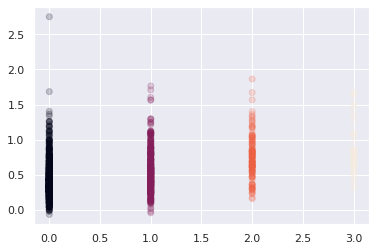

In [ ]:
plt.scatter(y, y_new, c=y,alpha = 0.2)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3, include_bias=False)
X_pca_95_poly = poly.fit_transform(X_pca_95)

In [ ]:
from sklearn.linear_model import Ridge
model = Ridge(alpha = 0.1)
model.fit (X_pca_95_poly, y)
model.score(X_pca_95_poly, y)

0.19005624715242608

In [ ]:
y_poly = model.predict(X_pca_95_poly)
y_poly

array([0.25107951, 0.25286429, 0.28948183, ..., 0.75589848, 1.01171243,
       1.02885591])

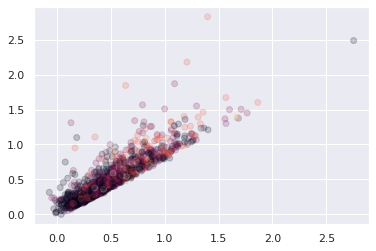

In [ ]:
plt.scatter(y_new, y_poly, c= y, alpha=0.2)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X_pca_95, y_new, random_state=42)

In [ ]:
from sklearn.linear_model import Ridge
model = Ridge(alpha = 0.1)
model.fit (X_train, y_train)
model.score(X_test, y_test)

0.983463232372316

In [ ]:
X_pred = model.predict(X_train)
model.score(X_train, y_train)

0.98319225143939

In [ ]:
y_orient = data["ORIENT"]
y_orient

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1595    0.0
1596    0.0
1597    1.0
1598    0.0
1599    0.5
Name: ORIENT, Length: 1600, dtype: float64

In [ ]:
from sklearn.linear_model import Ridge
model = Ridge(alpha = 0.01)
model.fit (X_pca_95, y_orient)
model.score(X_pca_95, y_orient)
y_new2 = model.predict(X_pca_95)
y_new2

array([0.09733829, 0.10247419, 0.0828074 , ..., 0.36460125, 0.55080706,
       0.50891669])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X_pca_95, y_new2, random_state=42)

In [ ]:
from sklearn.linear_model import Ridge
model = Ridge(alpha = 0.1)
model.fit (X_train, y_train)
model.score(X_test, y_test)

0.9840015334764577

In [ ]:
X_pred = model.predict(X_train)
model.score(X_train, y_train)

0.9839206560702944

In [ ]:
y_cdr = data["CDRGLOB"]
y_cdr

0       0
1       0
2       0
3       0
4       0
       ..
1595    0
1596    0
1597    2
1598    0
1599    1
Name: CDRGLOB, Length: 1600, dtype: int64

In [ ]:
y_all_2 = np.array([y_new, y_new2])
y_all_2

array([[0.31561246, 0.25502337, 0.36483747, ..., 0.84018399, 1.13929836,
        1.09236908],
       [0.09733829, 0.10247419, 0.0828074 , ..., 0.36460125, 0.55080706,
        0.50891669]])

In [ ]:
y_all_2 = y_all_2.T

In [ ]:
y_all_2

array([[0.31561246, 0.09733829],
       [0.25502337, 0.10247419],
       [0.36483747, 0.0828074 ],
       ...,
       [0.84018399, 0.36460125],
       [1.13929836, 0.55080706],
       [1.09236908, 0.50891669]])

In [ ]:
a = data[["SEX", "INDEPEND", "NACCMMSE"]].values
a

array([[ 2,  1, 26],
       [ 2,  1, 29],
       [ 2,  1, 26],
       ...,
       [ 1,  2, 26],
       [ 2,  1, 26],
       [ 2,  2, 27]])

In [ ]:
y_all_3 = np.column_stack([y_all_2,a, LLE_out ])

In [ ]:
y_all_3

array([[ 0.31561246,  0.09733829,  2.        , ..., -0.00296832,
         0.0215294 ,  0.02409938],
       [ 0.25502337,  0.10247419,  2.        , ...,  0.01165385,
        -0.01288181,  0.04377579],
       [ 0.36483747,  0.0828074 ,  2.        , ...,  0.00453057,
        -0.0058987 ,  0.00861425],
       ...,
       [ 0.84018399,  0.36460125,  1.        , ...,  0.00378997,
        -0.01427366, -0.03974593],
       [ 1.13929836,  0.55080706,  2.        , ...,  0.00434519,
        -0.01498462, -0.03579542],
       [ 1.09236908,  0.50891669,  2.        , ...,  0.00312109,
        -0.00891394, -0.04322075]])

In [ ]:
y_cdr2 = pd.DataFrame(y_cdr,dtype=str)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (y_all_3, y_cdr2, stratify=y_cdr2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, random_state=0, max_depth=5)
model.fit (X_train, y_train)
model.score(X_test, y_test)

0.71

In [ ]:
X_pred = model.predict(X_train)
model.score(X_train, y_train)

0.81

In [ ]:
ypred = model.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(ypred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       312
           1       0.34      0.51      0.41        70
           2       0.19      0.40      0.26        15
           3       0.20      0.67      0.31         3

    accuracy                           0.71       400
   macro avg       0.42      0.59      0.46       400
weighted avg       0.81      0.71      0.75       400



In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit (X_train, y_train)
model.score(X_test, y_test)

0.7125

0.7125